# 1. Import

In [1]:
import pandas as pd

file_path = r"C:\Users\imaja\OneDrive\Desktop\MBA 2022 -2024\T4\MLA1\CIA3\filtered_data.csv"

filtered_df2 = pd.read_csv(file_path)

# 2. Class Imbalance Checking

## Multiclass Classification

In [2]:
class_counts = filtered_df2['HDI-UN_Multiple'].value_counts()

In [3]:
class_counts

Good Life Quality         78
Very Good Life Quality    76
Poor Life Quality         17
Name: HDI-UN_Multiple, dtype: int64

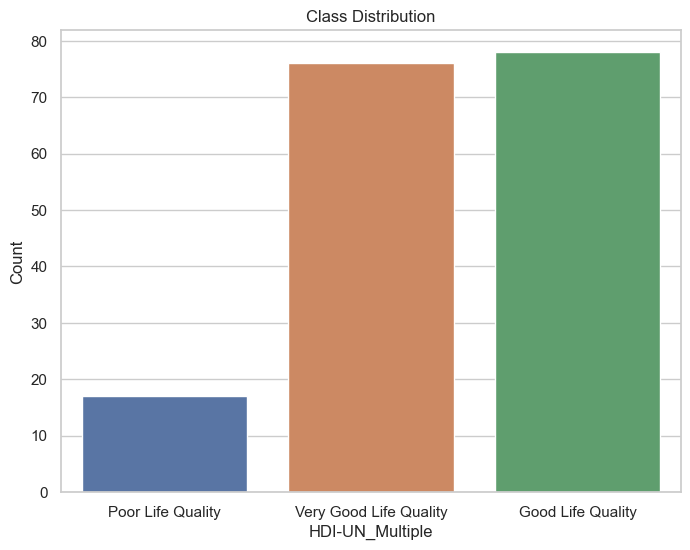

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df2, x='HDI-UN_Multiple')

plt.xlabel('HDI-UN_Multiple')

plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


# 3. Class Imbalance Handling - Oversampling

In [5]:
#%pip install imbalanced-learn

In [6]:
from imblearn.over_sampling import RandomOverSampler

In [7]:
from sklearn.model_selection import train_test_split

# Split your dataset into features (X) and labels (y)
X, y = filtered_df2.drop(columns=['HDI-UN','HDI-UN_Binary','HDI-UN_Multiple']), filtered_df2['HDI-UN_Multiple']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
print(X.shape)
print(y.shape)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(171, 26)
(171,)
(136, 26)
(35, 26)
(136,)
(35,)


In [9]:
# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [10]:
y_train_resampled

0           Good Life Quality
1      Very Good Life Quality
2      Very Good Life Quality
3           Good Life Quality
4      Very Good Life Quality
                ...          
178         Poor Life Quality
179         Poor Life Quality
180         Poor Life Quality
181         Poor Life Quality
182         Poor Life Quality
Name: HDI-UN_Multiple, Length: 183, dtype: object

In [11]:
y_train_resampled.value_counts()

Good Life Quality         61
Very Good Life Quality    61
Poor Life Quality         61
Name: HDI-UN_Multiple, dtype: int64

# 4. Modelling - Decision Tree, Random Forest & Linear Discriminant Analysis

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 4.1 Decision Tree

In [13]:
# Create the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the oversampled training data
decision_tree.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(random_state=42)

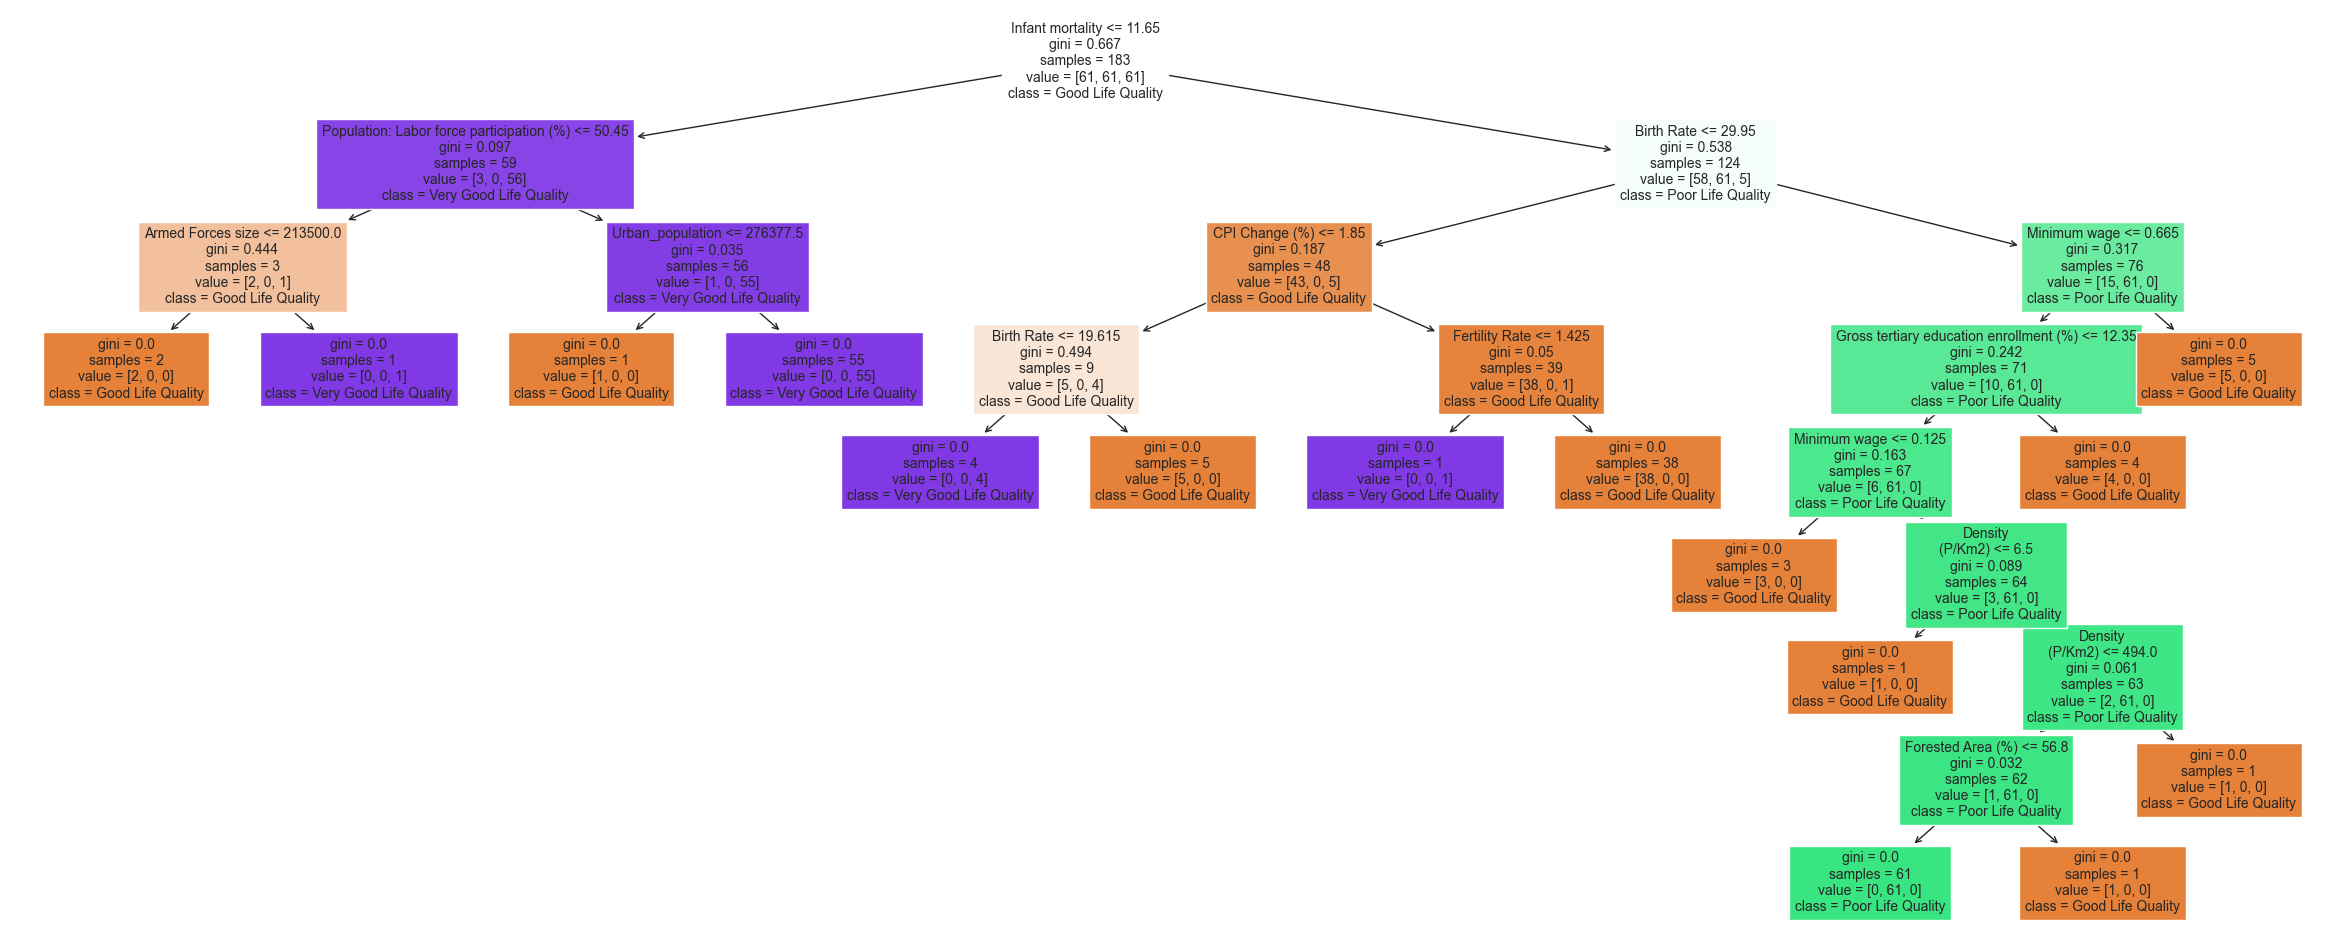

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Get the unique class names from the target variable 'y_resampled'
class_names = sorted(y_train_resampled.unique())

# Visualize the Decision Tree
plt.figure(figsize=(30, 12))
# Plot the Decision Tree with higher resolution (dpi)
plot_tree(decision_tree, filled=True, feature_names=X.columns.tolist(), class_names=[str(class_name) for class_name in class_names], fontsize=10)
plt.show()

### 4.1.1. Predict

In [15]:
y_pred = decision_tree.predict(X_test)

### 4.1.1. Decision Tree Model Evaluation

In [16]:
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


Accuracy: 0.80
                        precision    recall  f1-score   support

     Good Life Quality       0.86      0.71      0.77        17
     Poor Life Quality       0.50      1.00      0.67         3
Very Good Life Quality       0.87      0.87      0.87        15

              accuracy                           0.80        35
             macro avg       0.74      0.86      0.77        35
          weighted avg       0.83      0.80      0.80        35

[[12  3  2]
 [ 0  3  0]
 [ 2  0 13]]


## 4.2. Random Forest

In [17]:
# Create the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the model on the oversampled training data
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

### 4.2.1 Predict

In [18]:
y_pred = random_forest.predict(X_test)

### 4.2.2 Random Forest Model Evaluation

In [19]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


Accuracy: 0.86
                        precision    recall  f1-score   support

     Good Life Quality       0.88      0.82      0.85        17
     Poor Life Quality       0.40      0.67      0.50         3
Very Good Life Quality       1.00      0.93      0.97        15

              accuracy                           0.86        35
             macro avg       0.76      0.81      0.77        35
          weighted avg       0.89      0.86      0.87        35

[[14  3  0]
 [ 1  2  0]
 [ 1  0 14]]


## 4.3. Linear Discriminant Analysis (LDA)

In [20]:
# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Train the model on the oversampled training data
lda.fit(X_train_resampled, y_train_resampled)

LinearDiscriminantAnalysis()

### 4.3.1 Predict

In [21]:
y_pred = lda.predict(X_test)

### 4.3.2 LDA Model Evaluation

In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Display the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


Accuracy: 0.77
                        precision    recall  f1-score   support

     Good Life Quality       0.80      0.71      0.75        17
     Poor Life Quality       0.33      0.67      0.44         3
Very Good Life Quality       0.93      0.87      0.90        15

              accuracy                           0.77        35
             macro avg       0.69      0.75      0.70        35
          weighted avg       0.82      0.77      0.79        35

[[12  4  1]
 [ 1  2  0]
 [ 2  0 13]]
